In [ ]:
'''
Machine Learning: Deep Learning HW4 Problem 1(a)
Author:Hongtau Wu, Suzanna Sia
'''

'\nMachine Learning: Deep Learning HW4 Problem 1(a)\nAuthor:Hongtau Wu, Suzanna Sia\n'

In [ ]:
# from google.colab import files
# uploaded = files.upload()

import numpy as np
np.random.rand(100)
data = np.load('/content/HW4_Q1_data.npy')
Y = data[:,2]
X = data[:,0:2]

p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Helper code for visualisation

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def visualise_polygons(p0, p1):
  fig, ax = plt.subplots()
  patches = []
  polygon1 = Polygon(p0, True)
  polygon2 = Polygon(p1, True)
  patches.append(polygon1)
  patches.append(polygon2)

  p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
  ax.add_collection(p)
  ax.autoscale_view()
  plt.show()

def visualise_datapoints(X, Y):
  assert(X.shape[0] == Y.shape[0])
  fig, ax = plt.subplots()

  npts = 60000
  col = np.where(Y[:npts]==1,'m','b')

  x1 = X[:npts][:,0]
  x2 = X[:npts][:,1]
  ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
  plt.show()

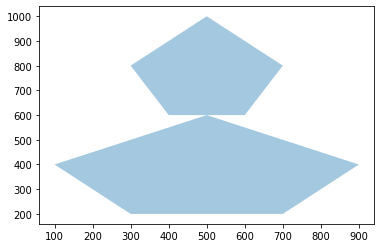

In [ ]:
visualise_polygons(p0,p1)

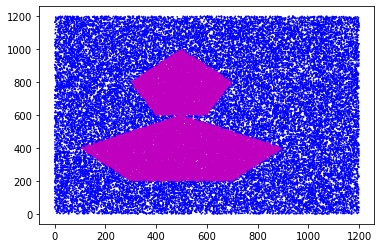

In [ ]:
visualise_datapoints(X, Y)

### 1a) Fill in #TODOs


In [ ]:
def threshold_activation1(x):
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    val = 1 if x.sum() == np.size(x) else 0
    return val

def or_gate(x):
    val = 1 if x.sum() > 0 else 0
    return val

def analytical_parameters(p0, p1):
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10

    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))

    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
            
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1

    return W,b 

def predict_output(X, W, b):
    predictions = []
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
  
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]

        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        
        # Output layer
        # input_to_final_gate = np.array([first_gate_output, second_gate_output])
        
        # Output layer for first polygon only
        input_to_final_gate = np.array([first_gate_output])
        
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):    
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
      if py == true_y[i]:
        true_prediction_num += 1
        
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

##### Sanity check: If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly.

Accuracy:  1.0


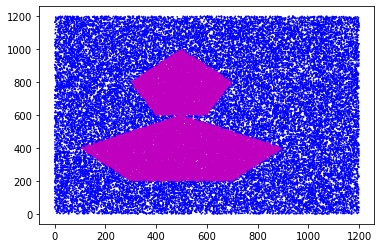

In [ ]:
W, b = analytical_parameters(p0, p1)
pred_Y = predict_output(X, W, b)

acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)
visualise_datapoints(X, np.array(pred_Y))

In the code above, change the gates such that only the points in the first_polygon [[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]] are classified correctly. Visualise your result, report the accuracy of this model, and attach it to the submission.

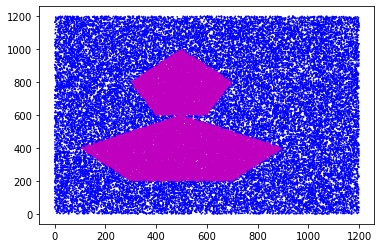

In [ ]:
# change only the usage of the gating functions, not the code inside the gating function

W, b = analytical_parameters(p0, p1)
pred_Y = predict_output(X, W, b)
visualise_datapoints(X, np.array(pred_Y))

##### 1b,1c,2) You can complete this in the jupyter notebook or elsewhere. Remember to attach your code if you do this elsewhere.

### 1b) Creating an MLP

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
class Net(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Net, self).__init__()

    ##feedfoward layers:
    self.ff1 = nn.Linear(input_size, 10) #input -> hidden layer 1

    self.ff2 = nn.Linear(10, 2) #hidden layer 1 -> hidden layer 2

    self.ff_out = nn.Linear(2, num_classes) #hidden layer 2 -> logit layer     

    ##activations:
    self.sigmoid = nn.Sigmoid()

  def forward(self, input_data):
    out = self.sigmoid(self.ff1(input_data)) 
    out = self.sigmoid(self.ff2(out)) 
    out = self.ff_out(out)
    return out #returns class probabilities for each image


In [ ]:
data_tensor = torch.tensor(data).float()

TRAIN_Y = data_tensor[:50000,2]
TRAIN_X = data_tensor[:50000,0:2]
TRAIN_X = (TRAIN_X - torch.mean(TRAIN_X, 0))/ torch.std(TRAIN_X, 0)

TEST_Y = data_tensor[50000:,2]
TEST_X = data_tensor[50000:,0:2]
TEST_X = (TEST_X - torch.mean(TEST_X, 0))/ torch.std(TEST_X, 0)

TRAIN = TensorDataset(TRAIN_X,TRAIN_Y)
train_loader = torch.utils.data.DataLoader(dataset=TRAIN, batch_size = 128, shuffle=True)

TRAIN = TensorDataset(TEST_X,TEST_Y)
test_loader = torch.utils.data.DataLoader(dataset=TRAIN, batch_size = 128, shuffle=False)

In [ ]:
# Calculate accuracy for net on data and labels
def calc_accuracy(net, data, labels):
    true_y = labels
    sig = nn.Sigmoid()

    outputs = net.forward(data)
    y_hat = sig(outputs)
    pred_y = torch.round(y_hat)
    pred_y = pred_y[:,0]

    true_prediction_num = 0
    for i, py in enumerate(pred_y):
      if py == true_y[i]:
        true_prediction_num += 1
        
    accuracy = true_prediction_num / len(pred_y)
    return accuracy

# Calculate loss for net on data and labels
def calc_loss(net, data, labels):
    y = labels
    sig = nn.Sigmoid()

    outputs = net.forward(data)
    y_hat = sig(outputs)
    y_hat = y_hat[:,0]
    loss = loss_metric(y_hat, y)

    return loss.cpu().data.numpy().item()

# Calculate accuracy between predictions and true values
def calc_acc(y_hat, labels):
    true_y = labels
    pred_y = torch.round(y_hat)
    pred_y = pred_y[:,0]

    true_prediction_num = 0
    for i, py in enumerate(pred_y):
      if py == true_y[i]:
        true_prediction_num += 1
        
    accuracy = true_prediction_num / len(pred_y)
    return accuracy

In [ ]:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight.data)
        m.bias.data.fill_(0)


def train(net, optimizer, loss_metric, epochs=500):
    #defining batch train loss recording arrays for later visualization/plotting:
    loss_store = []
    acc_store = []

    sig = nn.Sigmoid()

    print("Starting Training")
    print('=' * 75)
    #training loop:
    for epoch in range(epochs):
        print("\t\tEpoch: ", epoch + 1, "\n")
        for i, (x,y) in enumerate(train_loader):

            # Calculate the loss and gradient
            optimizer.zero_grad()

            outputs = net.forward(x)
            y_hat = sig(outputs)
            loss = loss_metric(y_hat[:,0], y)
            loss.backward()

            # Perform update
            optimizer.step()

            # store every 200th loss
            if i == 0:
                batch_loss = loss.cpu().data.numpy().item()
                batch_acc = calc_acc(y_hat, y)
                
                loss_store.append(batch_loss)
                acc_store.append(batch_acc)

                # print("Iter: ", i)
                print("Loss: ", batch_loss)
                print("Accuracy: ", batch_acc)
                print()
        
        print('=' * 75)

    return loss_store, acc_store

In [ ]:
torch.manual_seed(20)

In [ ]:
net = Net(input_size = 2, num_classes = 1)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.005)
loss_metric = nn.BCELoss()
net.apply(weights_init)
loss_store, acc_store = train(net, optimizer, loss_metric)

acc1 = calc_accuracy(net, TEST_X, TEST_Y)
acc2 = calc_accuracy(net, TRAIN_X, TRAIN_Y)
print("Test accuracy: ", acc1)
print("Test accuracy: ", acc2)

Starting Training
		Epoch:  1 

Loss:  0.7133038640022278
Accuracy:  0.5078125

		Epoch:  2 

Loss:  0.5166712403297424
Accuracy:  0.734375

		Epoch:  3 

Loss:  0.47738081216812134
Accuracy:  0.7578125

		Epoch:  4 

Loss:  0.47371426224708557
Accuracy:  0.75

		Epoch:  5 

Loss:  0.48857542872428894
Accuracy:  0.7265625

		Epoch:  6 

Loss:  0.5067105293273926
Accuracy:  0.71875

		Epoch:  7 

Loss:  0.49024534225463867
Accuracy:  0.75

		Epoch:  8 

Loss:  0.43797820806503296
Accuracy:  0.78125

		Epoch:  9 

Loss:  0.5575138926506042
Accuracy:  0.7109375

		Epoch:  10 

Loss:  0.4581868052482605
Accuracy:  0.7734375

		Epoch:  11 

Loss:  0.2978050708770752
Accuracy:  0.890625

		Epoch:  12 

Loss:  0.16990023851394653
Accuracy:  0.953125

		Epoch:  13 

Loss:  0.1439521461725235
Accuracy:  0.953125

		Epoch:  14 

Loss:  0.21014422178268433
Accuracy:  0.921875

		Epoch:  15 

Loss:  0.20173218846321106
Accuracy:  0.9296875

		Epoch:  16 

Loss:  0.15061983466148376
Accuracy:  0.93

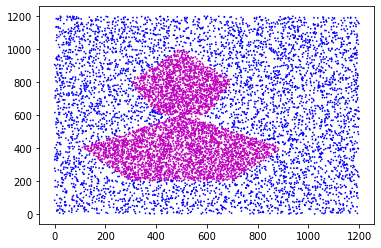

Test accuracy:  0.9938


In [ ]:
X = data[50000:,0:2]

sig = nn.Sigmoid()
outputs = net.forward(TEST_X)
y_hat = sig(outputs)
pred_y = torch.round(y_hat)
Y = pred_y[:,0]
    
visualise_datapoints(X, Y)

acc = calc_accuracy(net, TEST_X, TEST_Y)
print("Test accuracy: ", acc)

ValueError: ignored

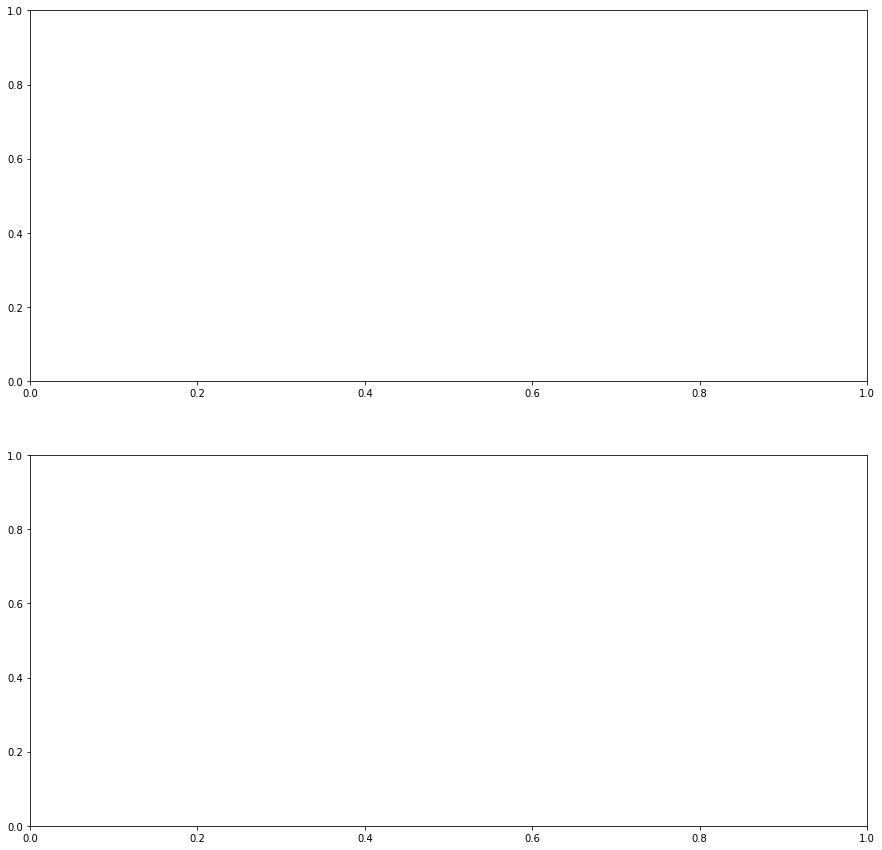

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(15,15))
axs[0].plot(np.linspace(0, 500, 500), loss_store)
axs[0].set_title("Loss")
axs[0].set(xlabel = "Epoch")

axs[1].plot(np.linspace(0, 500, 500), acc_store)
axs[1].set_title("Accuracy")
axs[1].set(xlabel = "Epoch")

### 1c) Expanding the MLP

In [ ]:
class Net2(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Net2, self).__init__()

    ##feedfoward layers:
    self.ff1 = nn.Linear(input_size, 10) #input -> hidden layer 1

    self.ff2 = nn.Linear(10, 15) #hidden layer 1 -> hidden layer 2
    self.ff3 = nn.Linear(15, 10) #hidden layer 2 -> hidden layer 3
    self.ff4 = nn.Linear(10, 2) #hidden layer 3 -> hidden layer 4

    self.ff_out = nn.Linear(2, num_classes) #hidden layer 4 -> logit layer     

    ##activations:
    self.sigmoid = nn.Sigmoid()

  def forward(self, input_data):
    out = self.sigmoid(self.ff1(input_data)) 
    out = self.sigmoid(self.ff2(out))
    out = self.sigmoid(self.ff3(out))
    out = self.sigmoid(self.ff4(out))
    out = self.ff_out(out)
    return out #returns class probabilities for each image

In [ ]:
torch.manual_seed(20)
net2 = Net2(input_size = 2, num_classes = 1)
optimizer = torch.optim.Adam(net2.parameters(), lr = 0.005)
loss_metric = nn.BCELoss()
net2.apply(weights_init)
loss_store, acc_store = train(net2, optimizer, loss_metric)

In [ ]:
X = data[50000:,0:2]

sig = nn.Sigmoid()
outputs = net2.forward(TEST_X)
y_hat = sig(outputs)
pred_y = torch.round(y_hat)
Y = pred_y[:,0]
    
visualise_datapoints(X, Y)

acc1 = calc_accuracy(net2, TEST_X, TEST_Y)
acc2 = calc_accuracy(net2, TRAIN_X, TRAIN_Y)
print("Test accuracy: ", acc1)
print("Train accuracy: ", acc2)

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(15,15))
axs[0].plot(np.linspace(0, 500, 500), loss_store)
axs[0].set_title("Loss")
axs[0].set(xlabel = "Epoch")

axs[1].plot(np.linspace(0, 500, 500), acc_store)
axs[1].set_title("Accuracy")
axs[1].set(xlabel = "Epoch")